In [1]:
import numpy as np 
import pandas as pd
from scipy.interpolate import UnivariateSpline 
import matplotlib.pyplot as plt
plt.style.use('sensitivity.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
# 2020 Baseline sensitivity and discovery potential numbers 
Data = {}
Data['Baseline Sensitivity'] = {} 
Data['Baseline Sensitivity']['Livetime'] = np.array([0.0, 0.5, 1.0, 2.0, 5.0, 10.0])
Data['Baseline Sensitivity']['Halflife'] = np.array([1e-27, 1.387, 2.157, 3.659, 6.377, 9.899])*1E27
Data['Baseline Discovery'] = {} 
Data['Baseline Discovery']['Livetime'] = np.array([0.0, 0.5, 1.0, 2.0, 5.0, 10.0])
Data['Baseline Discovery']['Halflife'] = np.array([1e-27, 0.883, 1.49, 2.32, 4.19, 5.46])*1E27

In [3]:
# Spline fit to smooth out curves
spline_sensitivity = UnivariateSpline(x=Data['Baseline Sensitivity']['Livetime'], 
                                      y=Data['Baseline Sensitivity']['Halflife'], 
                                      k=2)
spline_discovery = UnivariateSpline(x=Data['Baseline Discovery']['Livetime'], 
                                    y=Data['Baseline Discovery']['Halflife'], 
                                    k=2)
xs1 = np.linspace(0.01, 10, 1000)

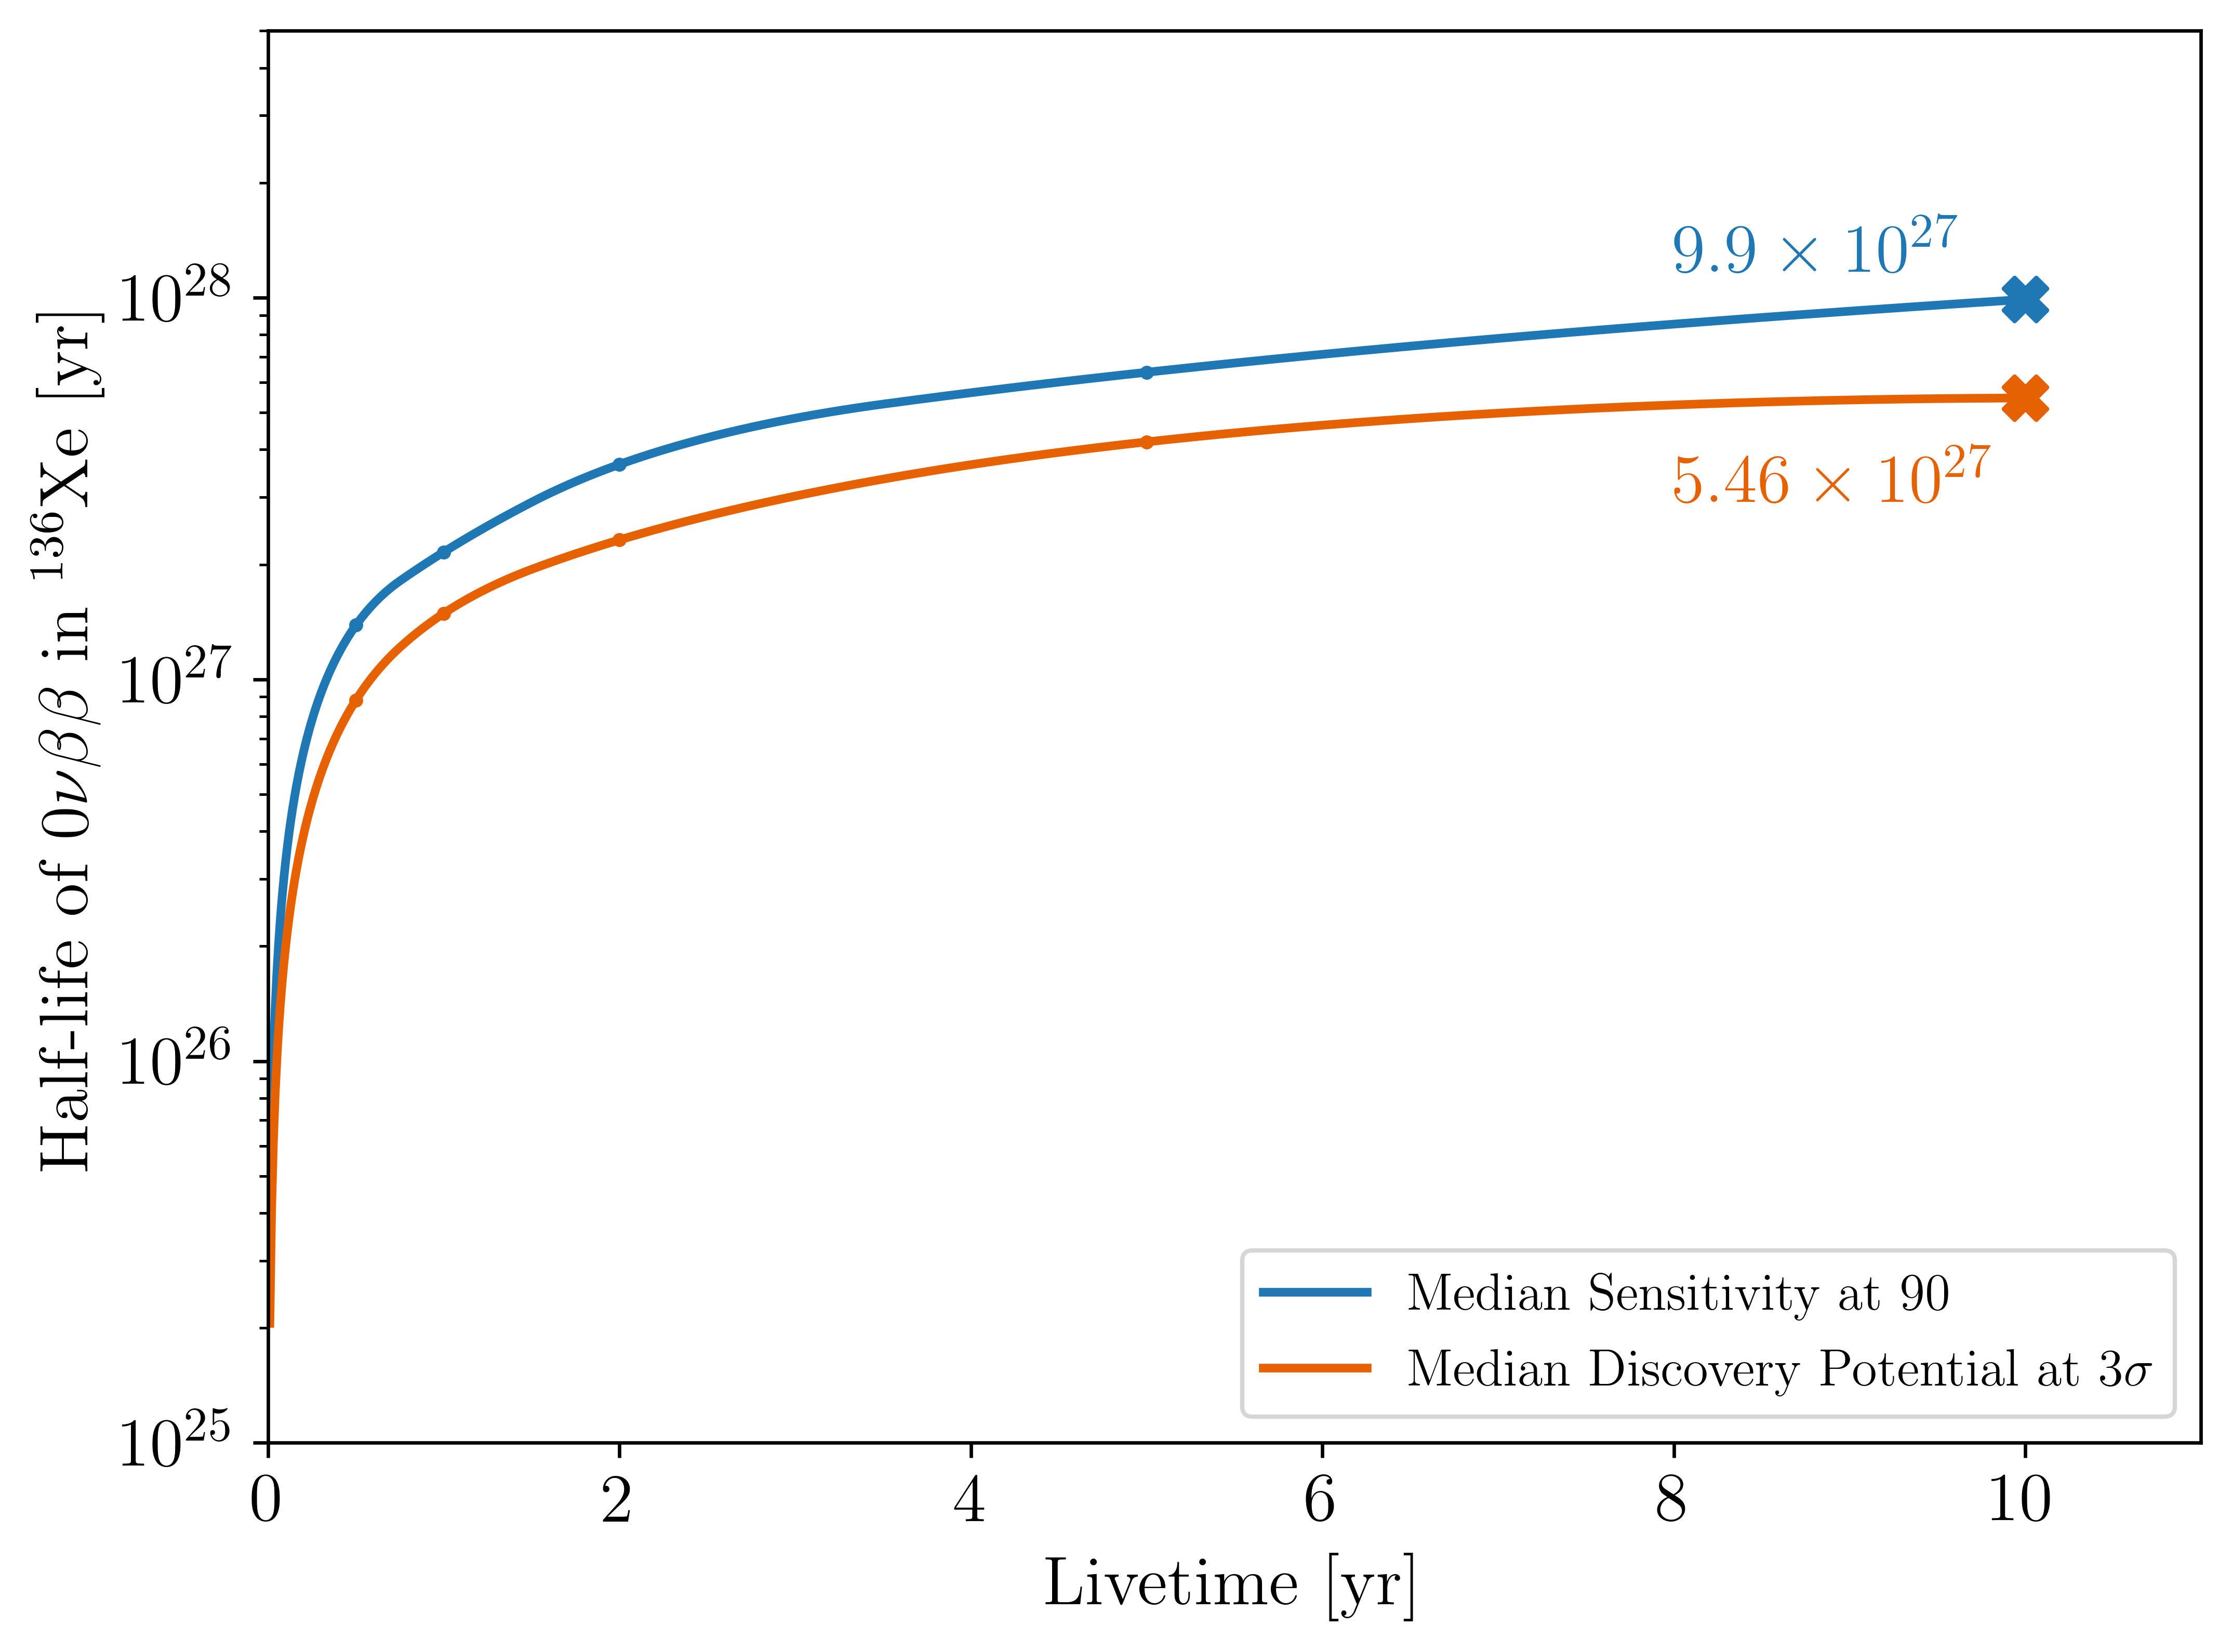

In [5]:
fig = plt.figure()
plt.xlabel('Livetime [yr]')
plt.ylabel('Half-life of $0\\nu\\beta\\beta$ in ${}^{136}\mathrm{Xe}$ [yr]')
plt.xlim(0,11)
plt.ylim(1E25,5E28)
plt.yscale('log')


plt.scatter(x=Data['Baseline Sensitivity']['Livetime'], 
            y=Data['Baseline Sensitivity']['Halflife'], 
            color=colors[0], label='', s=20, marker='.')
plt.scatter(x=Data['Baseline Discovery']['Livetime'], 
            y=Data['Baseline Discovery']['Halflife'], 
            label='', color=colors[1], s=20, marker='.')

plt.plot(xs1, 
         spline_sensitivity(xs1), 
         label='Median Sensitivity at 90% C.L.', 
         color=colors[0])
plt.plot(xs1, 
         spline_discovery(xs1), 
         label='Median Discovery Potential at $3\sigma$', 
         color=colors[1])

plt.scatter(x=Data['Baseline Sensitivity']['Livetime'][-1], 
            y=Data['Baseline Sensitivity']['Halflife'][-1], 
            label='', marker='X', color=colors[0])
plt.scatter(x=Data['Baseline Discovery']['Livetime'][-1], 
            y=Data['Baseline Discovery']['Halflife'][-1], 
            label='', marker='X', color=colors[1])

plt.text(8, 1.2e28, '$9.9 \\times 10^{27} $', color=colors[0], fontsize=16)
plt.text(8, 0.3e28, '$5.46 \\times 10^{27} $', color=colors[1], fontsize=16)


plt.legend(loc='lower right')
plt.savefig('sens_dp_vs_livetime.png')